### CACAO Classification with CNN

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import cv2 as cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%matplotlib inline

In [2]:
img = cv2.imread('images/busuk/IMG_8450.JPG',cv2.IMREAD_UNCHANGED)

In [3]:
if img is None:
    sys.exit("Could not read the image.")

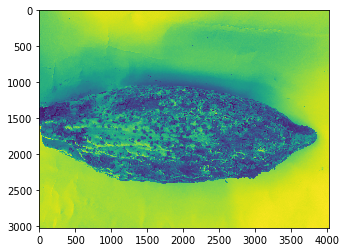

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

## Preprocessing Data to .csv files

In [54]:
BASE_DIR = 'images/'
busuk = BASE_DIR+'busuk/'
matang = BASE_DIR+'matang/'
mentah = BASE_DIR+'mentah/'
setengah_matang = BASE_DIR+'setengah_matang/'

files_in_busuk = sorted(os.listdir(busuk))
files_in_matang = sorted(os.listdir(matang))
files_in_mentah = sorted(os.listdir(mentah))
files_in_setengah_matang = sorted(os.listdir(setengah_matang))

df = pd.DataFrame()

path = [busuk+ str(x) for x in files_in_busuk]+[matang+ str(x) for x in files_in_matang]+[mentah+ str(x) for x in files_in_mentah]+[setengah_matang+ str(x) for x in files_in_setengah_matang]
label = [ label.split('/')[1] for label in path ]

df['path'] = path
df['label'] = label

df.to_csv('data/data.csv', columns=['path','label'],index=False)

In [5]:
def read_csv(path):
    return pd.read_csv(path)

In [6]:
data = read_csv('data/data.csv')

In [7]:
data['path']

0                 images/busuk/IMG_8450.JPG
1                 images/busuk/IMG_8451.JPG
2                 images/busuk/IMG_8452.JPG
3                 images/busuk/IMG_8453.JPG
4                 images/busuk/IMG_8454.JPG
                       ...                 
995    images/setengah_matang/IMG_E9353.JPG
996    images/setengah_matang/IMG_E9354.JPG
997    images/setengah_matang/IMG_E9355.JPG
998    images/setengah_matang/IMG_E9356.JPG
999    images/setengah_matang/IMG_E9357.JPG
Name: path, Length: 1000, dtype: object

In [8]:
def scaleImage(path):
    
    img = cv2.imread(path)
    img = cv2.medianBlur(img,5)
    
    scale_percent = 10 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    resized = cv2.resize(img, dim,cv2.COLOR_BGR2RGB)
    
    print('Resized Dimensions : ',resized.shape)

    plt.imshow(resized)
    plt.show()
    
    print('Grayscale Image: ')
    
    img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(img_gray)
    plt.show()
    
    print('RGB to HSV: ')
    print(resized)
    img_rgb_hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
    plt.imshow(img_rgb_hsv)
    plt.show()
    
    
#     print('Yellow color: ')
#     yellow_lower = np.array([20, 100, 100])
#     yellow_upper = np.array([30, 255, 255])
    
#     mask_yellow = cv2.inRange(img_rgb_hsv, yellow_lower, yellow_upper)

#     yellow_output = cv2.bitwise_and(img, img, mask=mask_yellow)

#     yellow_ratio =(cv2.countNonZero(mask_yellow))/(img.size/3)
    
#     plt.imshow(mask_yellow)
#     plt.show()
    
    print('Treshold image: ')
    ret, img_treshold = cv2.threshold(resized,127,255, cv2.THRESH_BINARY_INV)
#     fig = plt.figure(figsize=(7,9),frameon=False)

#     ax = plt.Axes(fig, [0., 0., 1., 1.])
#     ax.set_axis_off()
#     fig.add_axes(ax)
#     rgbImg = cv2.cvtColor(img_treshold, cv2.COLOR_BGR2RGB)
#     cv2.imwrite(os.path.join('train/busuk/' , 'waka.jpg'), rgbImg)
#     cv2.waitKey(0)
    plt.imshow(img_treshold)
    
#     plt.savefig('testss.png')
    plt.show()

Resized Dimensions :  (403, 302, 3)


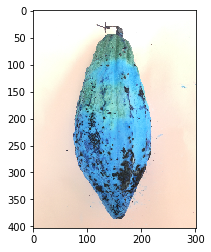

Grayscale Image: 


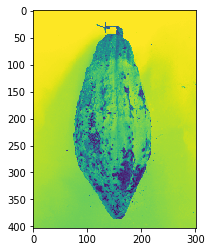

RGB to HSV: 
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 254]]

 ...

 [[245 215 196]
  [241 214 195]
  [241 214 194]
  ...
  [254 222 201]
  [254 223 202]
  [255 223 201]]

 [[243 216 196]
  [243 215 196]
  [242 214 196]
  ...
  [255 223 201]
  [254 223 201]
  [253 225 199]]

 [[241 214 194]
  [242 215 194]
  [242 215 195]
  ...
  [255 223 200]
  [253 222 201]
  [254 222 199]]]


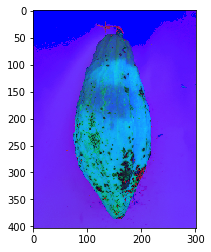

Treshold image: 


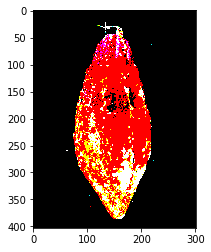

In [9]:
scaleImage(data['path'][900])

In [10]:
def threshold(img):
    ret, img_treshold = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
    return img_treshold

In [11]:
def read_img(path):
    img = cv2.imread(path)
    img = cv2.medianBlur(img,5)
    return img

In [12]:
def scale_img(img,scale=10):
    scale_percent = scale # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    resized = cv2.resize(img, (302,403),cv2.COLOR_BGR2RGB)
    return resized

In [13]:
def grayscale(img):
    img_gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_gray

In [14]:
def rgb_hsv(img):
    img_rgb_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return img_rgb_hsv

### Create new train and validation data

,path,label
0,train/busuk/IMG_8450.JPG,busuk
1,train/busuk/IMG_8451.JPG,busuk
2,train/busuk/IMG_8452.JPG,busuk
3,train/busuk/IMG_8453.JPG,busuk
4,train/busuk/IMG_8454.JPG,busuk
...,...,...
995,train/setengah_matang/IMG_E9353.JPG,setengah_matang
996,train/setengah_matang/IMG_E9354.JPG,setengah_matang
997,train/setengah_matang/IMG_E9355.JPG,setengah_matang
998,train/setengah_matang/IMG_E9356.JPG,setengah_matang


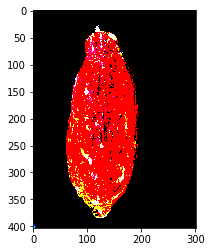

In [37]:
newPathCSV = []
newLabelCSV = []
newDf = pd.DataFrame()
for i in range(len(data)):
    
    FOLDER_TRAIN = 'train/'
    label = data['path'][i].split('/')[1]
    fileName = data['path'][i].split('/')[2]
    newPath = FOLDER_TRAIN+label+'/'
    
    img = read_img(data['path'][i])
    img = scale_img(img)
    img = threshold(img)
    
    plt.imshow(img)
    rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(newPath , fileName), rgbImg)
    cv2.waitKey(0)
#     plt.savefig(newPath)
    
    newPathCSV.append(newPath+fileName)
    newLabelCSV.append(label)
    

newDf['path'] = newPathCSV
newDf['label'] = newLabelCSV

newDf.to_csv('data/data_after_prepro.csv', columns=['path','label'],index=False)
    
newDf

In [99]:
newDf[["path", "label"]].groupby("label").count()

,path
label,
busuk,160
matang,310
mentah,225
setengah_matang,305


In [15]:
def modelCNN():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(300,300, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # the model so far outputs 3D feature maps (height, width, features)

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('softmax'))
    # COMPILE
    
    rmsprop = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy',
                  optimizer=rmsprop,
                  metrics=['accuracy'])
    model.summary()
    return model

In [16]:
model = modelCNN()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        1

In [17]:
def modelNewCNN():
    classifier = Sequential()
    #1-Convolution
    classifier.add(Conv2D(32, (3,3), strides=(1,1), input_shape = (300,300,3), activation = 'relu'))
    #2-Pooling
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    #add second conv
    classifier.add(Conv2D(32, (3,3), strides=(1,1), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    #add third conv
    classifier.add(Conv2D(32, (3,3), strides=(1,1), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    #add third conv
    classifier.add(Conv2D(64, (3,3), strides=(1,1), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    #add third conv
    classifier.add(Conv2D(64, (3,3), strides=(1,1), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    #3-Flattening
    classifier.add(Flatten())
    #4-Full Connection
    classifier.add(Dense(activation = 'relu', units = 900))
    classifier.add(Dense(activation = 'relu', units = 90))
    classifier.add(Dense(activation = 'softmax', units = 4))
    

    #Compiling CNN
    rmsprop = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
    classifier.compile(optimizer = rmsprop, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    classifier.summary()
    
    return classifier

In [18]:
model = modelNewCNN()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 64)       

In [19]:
def save_grafik(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('static/assets/accuracy.png')
    plt.close()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('static/assets/loss.png')
    plt.close()
    
    return "Save Successful"

In [20]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True)

# this is a generator that will read pictures found in subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'images_after_prepro/train',  # this is the target directory
        target_size=(300,300),  # all images will be resized to 300x300
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'images_after_prepro/validation',
        target_size=(300,300),
        batch_size=batch_size,
        class_mode='categorical')

Found 1000 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [21]:

history_callback = model.fit_generator(
        train_generator,
        steps_per_epoch=1000 // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=200 // batch_size)

model.save('data/model_new.h5')  # always save your weights after training or during training


loss_history = history_callback.history["loss"]
accuracy_history = history_callback.history["accuracy"]
val_loss_history = history_callback.history["val_loss"]
val_accuracy_history = history_callback.history["val_accuracy"]

numpy_loss_history = np.array(loss_history)
np.savetxt("static/assets/loss_history.txt", numpy_loss_history, delimiter=",")
#return numpy_loss_history
numpy_accuracy_history = np.array(accuracy_history)
np.savetxt("static/assets/acc_history.txt", numpy_accuracy_history, delimiter=",")

numpy_val_loss_history = np.array(val_loss_history)
np.savetxt("static/assets/val_loss_history.txt", numpy_val_loss_history, delimiter=",")
#return numpy_loss_history
numpy_val_accuracy_history = np.array(val_accuracy_history)
np.savetxt("static/assets/val_acc_history.txt", numpy_val_accuracy_history, delimiter=",")

save_grafik(history=history_callback)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
62/62 [==============================] - 76s 1s/step - loss: 1.1352 - accuracy: 0.4441 - val_loss: 0.9737 - val_accuracy: 0.5729
Epoch 2/100
62/62 [==============================] - 73s 1s/step - loss: 0.7800 - accuracy: 0.6402 - val_loss: 0.7019 - val_accuracy: 0.7135
Epoch 3/100
62/62 [==============================] - 72s 1s/step - loss: 0.5976 - accuracy: 0.7530 - val_loss: 0.5525 - val_accuracy: 0.8073
Epoch 4/100
62/62 [==============================] - 64s 1s/step - loss: 0.5033 - accuracy: 0.7835 - val_loss: 0.4892 - val_accuracy: 0.7812
Epoch 5/100
62/62 [==============================] - 61s 986ms/step - loss: 0.4695 - accuracy: 0.7998 - val_loss: 0.6098 - val_accuracy: 0.7448
Epoch 6/100
62/62 [==============================] - 61s 987ms/step - loss: 0.4498 - accuracy: 0.7978 - val_loss: 0.7164 - val_accuracy: 0.7188
Epoch 7/100
62/62 [==============================] - 61s 983ms/step - lo

62/62 [==============================] - 63s 1s/step - loss: 0.1008 - accuracy: 0.9624 - val_loss: 0.2356 - val_accuracy: 0.9375
Epoch 57/100
62/62 [==============================] - 65s 1s/step - loss: 0.0909 - accuracy: 0.9665 - val_loss: 0.1779 - val_accuracy: 0.9688
Epoch 58/100
62/62 [==============================] - 67s 1s/step - loss: 0.0928 - accuracy: 0.9614 - val_loss: 0.0900 - val_accuracy: 0.9792
Epoch 59/100
62/62 [==============================] - 79s 1s/step - loss: 0.0909 - accuracy: 0.9685 - val_loss: 0.1773 - val_accuracy: 0.9583
Epoch 60/100
62/62 [==============================] - 74s 1s/step - loss: 0.0848 - accuracy: 0.9715 - val_loss: 0.1607 - val_accuracy: 0.9740
Epoch 61/100
62/62 [==============================] - 66s 1s/step - loss: 0.0778 - accuracy: 0.9736 - val_loss: 0.1751 - val_accuracy: 0.9583
Epoch 62/100
62/62 [==============================] - 65s 1s/step - loss: 0.0791 - accuracy: 0.9726 - val_loss: 0.1388 - val_accuracy: 0.9688
Epoch 63/100
62/62 

'Save Successful'

### Loss and Accuracy Model

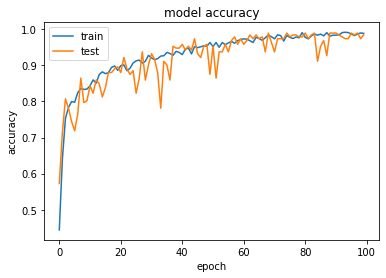

In [22]:
plt.plot(history_callback.history['accuracy'])
plt.plot(history_callback.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

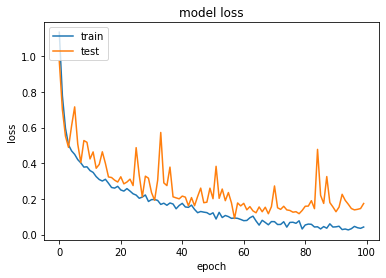

In [23]:
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

In [24]:
from tensorflow.keras.preprocessing import image

def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(300, 300))
    img = (np.asarray(img))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    return img_tensor

predImage = load_image('images/mentah/IMG_8010.JPG')
# predImage
pred = model.predict_classes(predImage)
pred
# load_image('images_after_prepro/validation/mentah/IMG_8026.JPG')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2])

In [25]:
load_model('data/model_new.h5')

### Load Model and Prediction Images

In [26]:
def loadModel(path):
    model_loaded = load_model(path)
    print(model_loaded)
    rmsprop = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
    model_loaded.compile(loss='categorical_crossentropy',
                optimizer=rmsprop,
                metrics=['accuracy'])
    model_loaded.summary()
    return 'Load Model Successfull'

In [27]:
modelPredict = loadModel('data/model_new.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 64)       

In [28]:
predImage = load_image('images/mentah/IMG_8010.JPG')
# predImage
pred = model.predict_classes(predImage)
pred

array([2])